COPY FROM t1 FOLDER: change input to have time-dependency and add LSTM model

Search for "FIXME" for tunable parameters

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

(10000, 2)
X [[ 0.72982333  0.27017667]
 [ 0.54897761  0.45102239]
 [ 0.62569454  0.37430546]
 [ 0.79305005  0.20694995]
 [ 0.74354766  0.25645234]
 [ 0.36633656  0.63366344]
 [ 0.62189575  0.37810425]
 [ 0.47584954  0.52415046]
 [ 0.48223245  0.51776755]
 [ 0.55036207  0.44963793]]


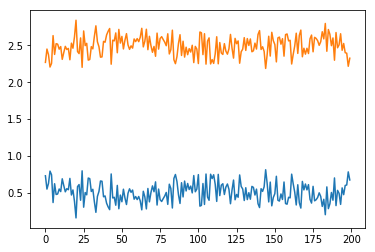

In [2]:
N=int(1e4) # FIXME 1e5

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000):
    n_features=5
    # n_samples, n_features = 2000, 5
    # X = np.random.uniform(0, 1, (n_samples, n_features))
    X = np.zeros((n_samples,n_features))
    
    sigma = 0.1
    xt=np.arange(0,n_samples/10,1/10)
    X[:,0] = .5 + .5*np.sin(1*xt) + np.random.normal(0, sigma, N) +1 # first sine wave
    X[:,1] = .5 + .5*np.sin(2*xt) + np.random.normal(0, sigma, N) +1 # second sine wave
    X[:,2] = 1*np.cos(1*xt) + np.random.normal(0, sigma, N) +1 # lagged version of first sine wave
    X[:,3] = X[:,1]*X[:, 2] # some non-linear relations between lagged and other
    X[:,4] = X[:,1]**2 * X[:, 0]**3 # some non-linear relations between 2 sines
    # auto-encoders need [0-1] range data
    # If PCA input is (mean=0,std=1) and AE is [0-1], MSE is incomparable
    # X = scale(X)
    X = utils.myNorm3(X)
    return X

def data2(n_samples:int=2000):
    n_features=2
    # n_samples, n_features = 2000, 5
    # X = np.random.uniform(0, 1, (n_samples, n_features))
    X = np.zeros((n_samples,n_features), dtype=np.float64)
    sigma = 0.1
    xt=np.arange(0,n_samples/10,1/10)
    X[:,0] = np.random.normal(0, sigma, N) +1 # first sine wave
    X[:,1] = -1*X[:,0]
    X = utils.myNorm3(X)
    return X

X = data2(N)

print(X.shape)
print('X',X[0:10,:])

utils.myPlot(X,2)

(10000, 2)


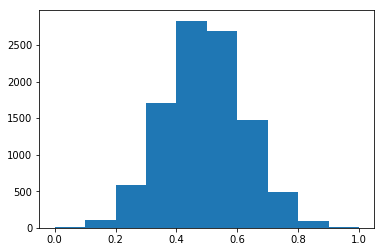

In [3]:
print(X.shape)
from matplotlib import pyplot as plt
plt.hist(X[:,0])
plt.show()

## Try AE and visualize with tensorboard

autoencoder
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
Train on 8000 samples, validate on 2000 samples
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:

0s - loss: 5.0152e-05 - val_loss: 6.4364e-05
Epoch 131/200
0s - loss: 5.0005e-05 - val_loss: 6.3265e-05
Epoch 132/200
0s - loss: 4.9966e-05 - val_loss: 6.3924e-05
Epoch 133/200
0s - loss: 4.9875e-05 - val_loss: 6.3162e-05
Epoch 134/200
0s - loss: 4.9682e-05 - val_loss: 6.2738e-05
Epoch 135/200
0s - loss: 4.9593e-05 - val_loss: 6.2423e-05
Epoch 136/200
0s - loss: 4.9272e-05 - val_loss: 6.2217e-05
Epoch 137/200
0s - loss: 4.9518e-05 - val_loss: 6.1997e-05
Epoch 138/200
0s - loss: 4.9159e-05 - val_loss: 6.4260e-05
Epoch 139/200
0s - loss: 4.9054e-05 - val_loss: 6.1548e-05
Epoch 140/200
0s - loss: 4.9016e-05 - val_loss: 6.1119e-05
Epoch 141/200
0s - loss: 4.8803e-05 - val_loss: 6.5013e-05
Epoch 142/200
0s - loss: 4.8772e-05 - val_loss: 6.2803e-05
Epoch 143/200
0s - loss: 4.8751e-05 - val_loss: 6.1990e-05
Epoch 144/200
0s - loss: 4.8491e-05 - val_loss: 6.0559e-05
Epoch 145/200
0s - loss: 4.8594e-05 - val_loss: 6.0212e-05
Epoch 146/200
0s - loss: 4.8405e-05 - val_loss: 6.0700e-05
Epoch 147/2

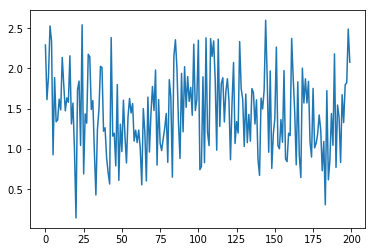

In [4]:
print("autoencoder")
N_epochs = 200
    
autoencoder, encoder = utils.buildNetwork(X.shape[1], encoding_dim_ae = 1)
#autoencoder, encoder = utils.buildNetwork2_deep(X.shape[1], enc_dim1 = 10, enc_dim2 = 1)
autoencoder.summary()

# https://stackoverflow.com/a/43549608/4126114
import keras
tensorboard = keras.callbacks.TensorBoard(log_dir='/tmp/tb/r8-dim-1-epochs200',
                 histogram_freq=1, 
                 write_graph=True, 
                 write_images=False)

X_rec = utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=2, callbacks=[tensorboard])    

AE1 mse1 =  0.100073597571
AE1 mse2 =  0.0133117969032
AE1 mse3 =  0.0134773907917
AE1 mse4 =  0.0131521606225


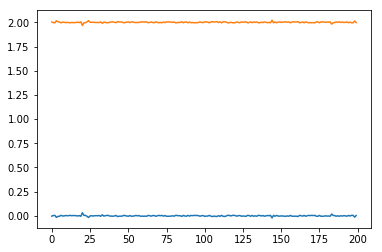

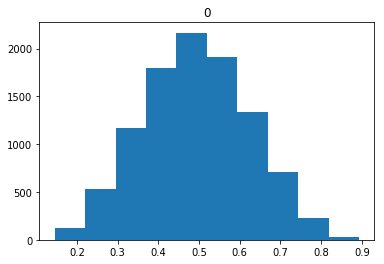

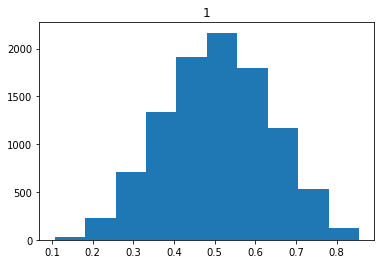

In [5]:
print("AE1 mse1 = ", utils.mse(X, utils.myNorm3(X_rec)))
print("AE1 mse2 = ", utils.mse(X, X_rec))
print("AE1 mse3 = ", utils.mse(X[:,0], X_rec[:,0]))
print("AE1 mse4 = ", utils.mse(X[:,1], X_rec[:,1]))
utils.myPlot(X_rec-X,2)
for i in range(2):
    plt.hist(X_rec[:,i])
    plt.title(i)
    plt.show()